In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

Python version : 3.10.2

Package : Pandas, Numpy, Seaborn, Matplotlib

In [ ]:
df = pd.read_excel('userflow_id.xlsx')
df.head()

,Unnamed: 0,(1) First App Open,(2) Read Oboarding,(3) Sign Up,(4) Load Topic,(5) Topic Choosed,(6) Load Learning Page,(7) Sub Topic Choosed,(8) Read Material,(9) Correct Answer Quiz,(10) Finish Hooray,(11) Exercise Choosed,(12) Exercise Choosed,(13) Correct Answer Exercise,(14) Finish Hooray,Aktif ga ya
0,0117FD20-2E2B-4F20-82C6-CEE3CAD0CB8F,1,1,1,1,1,1,1,1,1,1,1,0,0,0,Aktif
1,09DFCEC7-0C88-4507-9BE3-718771A1AA39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Ga lah
2,0AFFDB71-B14D-4F9C-BE5B-5A57A45E52C4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Ga lah
3,0ECD5988-28CE-4B81-A492-C59D14432062,1,1,1,0,0,0,0,0,0,0,0,0,0,0,Ga lah
4,1227FF13-A01B-467F-BFC4-2145AE0FDF93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Aktif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    74 non-null     object
 1   (1) First App Open            74 non-null     int64 
 2   (2) Read Oboarding            74 non-null     int64 
 3   (3) Sign Up                   74 non-null     int64 
 4   (4) Load Topic                74 non-null     int64 
 5   (5) Topic Choosed             74 non-null     int64 
 6   (6) Load Learning Page        74 non-null     int64 
 7   (7) Sub Topic Choosed         74 non-null     int64 
 8   (8) Read Material             74 non-null     int64 
 9   (9) Correct Answer Quiz       74 non-null     int64 
 10  (10) Finish Hooray            74 non-null     int64 
 11  (11) Exercise Choosed         74 non-null     int64 
 12  (12) Exercise Choosed         74 non-null     int64 
 13  (13) Correct Answer Ex

## Data Cleansing

Data yang tersedia clean, tidak ada yang perlu diubah

## Data Profiling



In [ ]:
df.columns = ['date', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Status']
df

,date,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Status
0,0117FD20-2E2B-4F20-82C6-CEE3CAD0CB8F,1,1,1,1,1,1,1,1,1,1,1,0,0,0,Aktif
1,09DFCEC7-0C88-4507-9BE3-718771A1AA39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Ga lah
2,0AFFDB71-B14D-4F9C-BE5B-5A57A45E52C4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Ga lah
3,0ECD5988-28CE-4B81-A492-C59D14432062,1,1,1,0,0,0,0,0,0,0,0,0,0,0,Ga lah
4,1227FF13-A01B-467F-BFC4-2145AE0FDF93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Aktif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,E5EB354C-E86B-47BF-89B7-8301EA52895A,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Ga lah
70,F326FF4F-AF23-4F63-8414-02C71F00E0F1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,Aktif
71,F6119266-3EDD-443F-9A80-24D53F1B24FB,1,1,1,1,1,1,1,1,1,1,1,1,1,0,Aktif
72,FE2F2899-8C58-4849-A361-7BF1FB72F258,1,1,1,1,1,1,1,1,1,1,1,0,0,1,Aktif


In [ ]:
df.drop(['J'], axis=1, inplace=True)

In [ ]:
df.drop(['K'], axis=1, inplace=True)

In [ ]:
df.drop(['date'], axis=1, inplace=True)

In [ ]:
df.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'Status']
df

,A,B,C,D,E,F,G,H,I,J,K,L,Status
0,1,1,1,1,1,1,1,1,1,0,0,0,Aktif
1,1,0,0,0,0,0,0,0,0,0,0,0,Ga lah
2,1,0,0,0,0,0,0,0,0,0,0,0,Ga lah
3,1,1,1,0,0,0,0,0,0,0,0,0,Ga lah
4,1,1,1,1,1,1,1,1,1,1,1,1,Aktif
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,1,0,0,0,0,0,0,0,0,0,0,Ga lah
70,1,1,1,1,1,1,1,1,1,1,1,0,Aktif
71,1,1,1,1,1,1,1,1,1,1,1,0,Aktif
72,1,1,1,1,1,1,1,1,1,0,0,1,Aktif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       74 non-null     int64 
 1   B       74 non-null     int64 
 2   C       74 non-null     int64 
 3   D       74 non-null     int64 
 4   E       74 non-null     int64 
 5   F       74 non-null     int64 
 6   G       74 non-null     int64 
 7   H       74 non-null     int64 
 8   I       74 non-null     int64 
 9   J       74 non-null     int64 
 10  K       74 non-null     int64 
 11  L       74 non-null     int64 
 12  Status  74 non-null     object
dtypes: int64(12), object(1)
memory usage: 7.6+ KB


## EDA

## Splitting Data

In [ ]:
X = df[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']]
y = df['Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
clf.score(X_test, y_test)

1.0

In [ ]:
predict = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       Aktif       1.00      1.00      1.00        16
      Ga lah       1.00      1.00      1.00         9

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



## IMPROVING MODELS

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
params_grid = {'max_leaf_nodes': list(range(0, 10)), 
               'min_samples_split': [0,1,2, 3, 4], 
               'min_samples_leaf': [0,1,2, 3, 4], 
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=75 , class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=75),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 4,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_features=4,
                       max_leaf_nodes=3, random_state=75)

In [ ]:
tree_best = grid_search.best_estimator_

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'Status'], dtype='object')

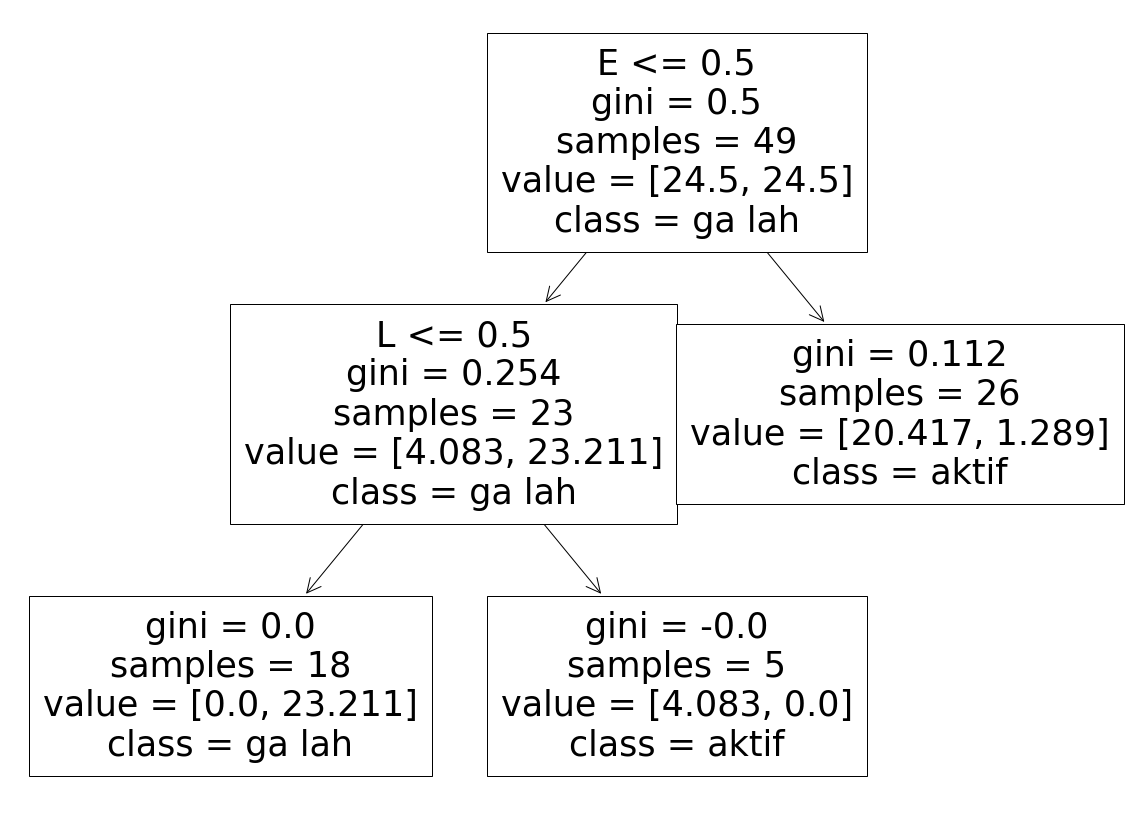

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=X_train.columns, class_names=['aktif', 'ga lah']);

In [ ]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    """
    Take the input data, model and labels and return accuracy
    
    """
    
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    
    return acc

In [ ]:
accuracy(X_train, tree_best, y_train)

0.9795918367346939

In [ ]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    
    """
    
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)
    
    return cm

In [ ]:
conf_matrix(X_train, tree_best, y_train)

array([[30,  0],
       [ 1, 18]])

In [ ]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    
    """
    
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)
    
    return report

In [ ]:
class_report(X_train, tree_best, y_train)

              precision    recall  f1-score   support

       Aktif       0.97      1.00      0.98        30
      Ga lah       1.00      0.95      0.97        19

    accuracy                           0.98        49
   macro avg       0.98      0.97      0.98        49
weighted avg       0.98      0.98      0.98        49




## Evaluating the model on the test set



In [ ]:
accuracy(X_test, tree_best, y_test)

0.96

In [ ]:
conf_matrix(X_test, tree_best, y_test)

array([[16,  0],
       [ 1,  8]])

In [ ]:
class_report(X_test, tree_best, y_test)

              precision    recall  f1-score   support

       Aktif       0.94      1.00      0.97        16
      Ga lah       1.00      0.89      0.94         9

    accuracy                           0.96        25
   macro avg       0.97      0.94      0.96        25
weighted avg       0.96      0.96      0.96        25

